# Problem Statement:-

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
from scipy import stats
from scipy.stats import norm
#from scipy.stats import boxcox
#import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [259]:
df = pd.read_csv("sample.csv",index_col=0)
df.head()

,po_nbr,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,...,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue,internal_risk1,internal_risk2,production_quality_risk,pdt_recsys,internal_risk3,out_of_stock
1259895,2842257,415.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,28.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,No,No,No
1453574,3043795,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.05,0.0,Yes,No,No,Yes,No,No
602282,1950252,71.0,8.0,6.0,100.0,140.0,160.0,14.0,35.0,71.0,...,0.0,0.93,0.94,0.0,No,No,No,Yes,No,No
480648,1828636,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.96,0.0,No,No,No,Yes,No,No
201010,1312565,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.69,0.40,0.0,Yes,No,No,Yes,No,No


In [189]:
df.shape

(192994, 23)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192994 entries, 0 to 192993
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   po_nbr                   192994 non-null  int64  
 1   present_inv              192994 non-null  float64
 2   lead_time                181317 non-null  float64
 3   total_whpk_qty           192994 non-null  float64
 4   fcst_3_mo                192994 non-null  float64
 5   fcst_6_mo                192994 non-null  float64
 6   fcst_9_mo                192994 non-null  float64
 7   sls_1_mo                 192994 non-null  float64
 8   sls_3_mo                 192994 non-null  float64
 9   sls_6_mo                 192994 non-null  float64
 10  sls_9_mo                 192994 non-null  float64
 11  minimum_stock_qty        192994 non-null  float64
 12  identified_defect        192994 non-null  object 
 13  spare_parts_overdue      192994 non-null  float64
 14  avg_

In [193]:
df.isnull().sum()*100/len(df)

po_nbr                     0.000000
present_inv                0.000000
lead_time                  6.050447
total_whpk_qty             0.000000
fcst_3_mo                  0.000000
fcst_6_mo                  0.000000
fcst_9_mo                  0.000000
sls_1_mo                   0.000000
sls_3_mo                   0.000000
sls_6_mo                   0.000000
sls_9_mo                   0.000000
minimum_stock_qty          0.000000
identified_defect          0.000000
spare_parts_overdue        0.000000
avg_ratings_6_mo           0.000000
avg_ratings_12_mo          0.000000
stock_overdue              0.000000
internal_risk1             0.000000
internal_risk2             0.000000
production_quality_risk    0.000000
pdt_recsys                 0.000000
internal_risk3             0.000000
out_of_stock               0.000000
dtype: float64

In [194]:
df.duplicated().sum()

0

In [199]:
4.071565e+02

407.1565

In [195]:
df.describe() #0.04

,po_nbr,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,sls_9_mo,minimum_stock_qty,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue
count,1.929940e+05,1.929940e+05,181317.000000,192994.000000,1.929940e+05,1.929940e+05,1.929940e+05,192994.000000,1.929940e+05,1.929940e+05,1.929940e+05,192994.000000,192994.000000,192994.000000,192994.000000,192994.000000
mean,2.256478e+06,4.071565e+02,7.857542,49.897406,1.916102e+02,3.689133e+02,5.411289e+02,60.369006,1.896981e+02,3.686664e+02,5.642267e+02,56.626481,2.907225,-6.914761,-6.504727,0.722162
std,7.644566e+05,7.308631e+03,6.995806,1669.073170,5.743923e+03,1.137062e+04,1.694249e+04,2115.744453,6.265479e+03,1.163180e+04,1.800806e+04,1612.953221,411.985042,26.622844,25.952688,38.620386
min,1.045867e+06,-1.349100e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,1.594203e+06,4.000000e+00,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.630000,0.660000,0.000000
50%,2.072349e+06,1.500000e+01,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,2.000000e+00,4.000000e+00,0.000000,0.000000,0.820000,0.810000,0.000000
75%,3.041604e+06,8.000000e+01,9.000000,0.000000,4.000000e+00,1.200000e+01,2.000000e+01,4.000000,1.500000e+01,3.100000e+01,4.700000e+01,3.000000,0.000000,0.960000,0.950000,0.000000
max,3.526980e+06,1.370327e+06,52.000000,328060.000000,1.218328e+06,2.461360e+06,3.777304e+06,366191.000000,1.084974e+06,2.146625e+06,3.197338e+06,311423.000000,137625.000000,1.000000,1.000000,6544.000000


In [202]:
print("Number of rows in dataframe df : ",df.shape[0]," and Number of unique IDs in dataframe df : ",len(df.po_nbr.unique()))

Number of rows in dataframe df :  192994  and Number of unique IDs in dataframe df :  192994


In [200]:
df['out_of_stock'].value_counts()

No     191582
Yes      1412
Name: out_of_stock, dtype: int64

In [201]:
for i in df.columns:
    print(i,':',df[i].nunique())

po_nbr : 192994
present_inv : 5612
lead_time : 32
total_whpk_qty : 1812
fcst_3_mo : 2857
fcst_6_mo : 3954
fcst_9_mo : 4793
sls_1_mo : 2012
sls_3_mo : 3631
sls_6_mo : 5111
sls_9_mo : 6207
minimum_stock_qty : 1984
identified_defect : 2
spare_parts_overdue : 312
avg_ratings_6_mo : 102
avg_ratings_12_mo : 102
stock_overdue : 236
internal_risk1 : 2
internal_risk2 : 2
production_quality_risk : 2
pdt_recsys : 2
internal_risk3 : 2
out_of_stock : 2


In [203]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

3147775    1
3501319    1
2949032    1
2219281    1
3265808    1
          ..
2175731    1
1206614    1
1132151    1
3261165    1
2885633    1
Name: po_nbr, Length: 192994, dtype: int64


0.0       12449
2.0       12248
3.0       10538
4.0        7827
5.0        6811
          ...  
9617.0        1
3081.0        1
5005.0        1
7591.0        1
4152.0        1
Name: present_inv, Length: 5612, dtype: int64


8.0     78313
2.0     38574
12.0    22780
4.0     14757
9.0     13934
52.0     3358
3.0      1728
10.0     1600
14.0     1205
0.0      1198
16.0     1052
13.0      596
6.0       578
17.0      465
15.0      419
5.0       417
11.0      119
20.0       54
30.0       44
18.0       37
22.0       20
7.0        14
24.0       13
26.0       10
21.0        8
28.0        6
40.0        6
1.0         4
23.0        3
19.0        2
35.0        2
25.0        1
Name: lead_time, dtype: int64


0.0        154038
1.0          4117
2.0          2496
3.0          1953
4.0          1736
            ...  


# EDA

In [179]:
df = pd.read_csv("sample.csv",index_col=0)

In [180]:
df.head()

,po_nbr,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,...,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue,internal_risk1,internal_risk2,production_quality_risk,pdt_recsys,internal_risk3,out_of_stock
1259895,2842257,415.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,28.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,No,No,No
1453574,3043795,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.05,0.0,Yes,No,No,Yes,No,No
602282,1950252,71.0,8.0,6.0,100.0,140.0,160.0,14.0,35.0,71.0,...,0.0,0.93,0.94,0.0,No,No,No,Yes,No,No
480648,1828636,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.96,0.0,No,No,No,Yes,No,No
201010,1312565,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.69,0.40,0.0,Yes,No,No,Yes,No,No


In [181]:
df = df.reset_index(drop=True)
df.head()

,po_nbr,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,...,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue,internal_risk1,internal_risk2,production_quality_risk,pdt_recsys,internal_risk3,out_of_stock
0,2842257,415.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,28.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,No,No,No
1,3043795,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.05,0.0,Yes,No,No,Yes,No,No
2,1950252,71.0,8.0,6.0,100.0,140.0,160.0,14.0,35.0,71.0,...,0.0,0.93,0.94,0.0,No,No,No,Yes,No,No
3,1828636,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.96,0.0,No,No,No,Yes,No,No
4,1312565,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.69,0.40,0.0,Yes,No,No,Yes,No,No


In [186]:
df[['minimum_stock_qty', 'identified_defect',
       'spare_parts_overdue', 'avg_ratings_6_mo', 'avg_ratings_12_mo',
       'stock_overdue', 'internal_risk1', 'internal_risk2',
       'production_quality_risk']][]

,minimum_stock_qty,identified_defect,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue,internal_risk1,internal_risk2,production_quality_risk
0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No
1,0.0,No,0.0,0.00,0.05,0.0,Yes,No,No
2,22.0,No,0.0,0.93,0.94,0.0,No,No,No
3,0.0,No,0.0,0.99,0.96,0.0,No,No,No
4,1.0,No,0.0,0.69,0.40,0.0,Yes,No,No
...,...,...,...,...,...,...,...,...,...
192989,0.0,No,0.0,0.96,0.97,0.0,No,No,No
192990,0.0,No,0.0,0.91,0.77,0.0,Yes,No,No
192991,0.0,No,0.0,0.90,0.82,0.0,No,No,No
192992,0.0,No,0.0,0.10,0.13,0.0,Yes,No,No


In [182]:
df.columns

Index(['po_nbr', 'present_inv', 'lead_time', 'total_whpk_qty', 'fcst_3_mo',
       'fcst_6_mo', 'fcst_9_mo', 'sls_1_mo', 'sls_3_mo', 'sls_6_mo',
       'sls_9_mo', 'minimum_stock_qty', 'identified_defect',
       'spare_parts_overdue', 'avg_ratings_6_mo', 'avg_ratings_12_mo',
       'stock_overdue', 'internal_risk1', 'internal_risk2',
       'production_quality_risk', 'pdt_recsys', 'internal_risk3',
       'out_of_stock'],
      dtype='object')

# EDA

In [187]:
df.head()

,po_nbr,present_inv,lead_time,total_whpk_qty,fcst_3_mo,fcst_6_mo,fcst_9_mo,sls_1_mo,sls_3_mo,sls_6_mo,...,spare_parts_overdue,avg_ratings_6_mo,avg_ratings_12_mo,stock_overdue,internal_risk1,internal_risk2,production_quality_risk,pdt_recsys,internal_risk3,out_of_stock
0,2842257,415.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,28.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,No,No,No
1,3043795,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.05,0.0,Yes,No,No,Yes,No,No
2,1950252,71.0,8.0,6.0,100.0,140.0,160.0,14.0,35.0,71.0,...,0.0,0.93,0.94,0.0,No,No,No,Yes,No,No
3,1828636,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.96,0.0,No,No,No,Yes,No,No
4,1312565,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.69,0.40,0.0,Yes,No,No,Yes,No,No


# Univariate Analysis 

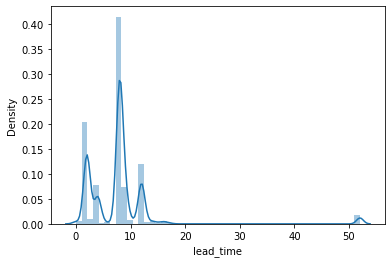

In [103]:
sns.distplot(df['lead_time'])
plt.show()

In [204]:
df.columns

Index(['po_nbr', 'present_inv', 'lead_time', 'total_whpk_qty', 'fcst_3_mo',
       'fcst_6_mo', 'fcst_9_mo', 'sls_1_mo', 'sls_3_mo', 'sls_6_mo',
       'sls_9_mo', 'minimum_stock_qty', 'identified_defect',
       'spare_parts_overdue', 'avg_ratings_6_mo', 'avg_ratings_12_mo',
       'stock_overdue', 'internal_risk1', 'internal_risk2',
       'production_quality_risk', 'pdt_recsys', 'internal_risk3',
       'out_of_stock'],
      dtype='object')

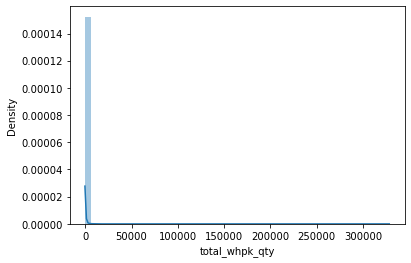

In [206]:
sns.distplot(df['total_whpk_qty']) 
plt.show()

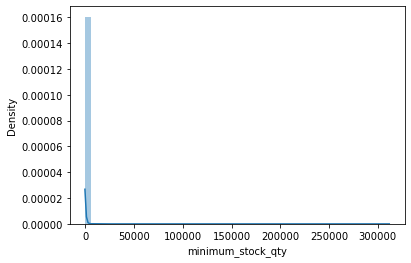

In [207]:
sns.distplot(df['minimum_stock_qty']) 
plt.show()

In [ ]:
#Basic Probabilties 

In [208]:
#Marginal, Joint, Conditional Probs

In [ ]:
P(out of stock scenario and risk3 = yes) ---joint

In [ ]:
P(oos)--marginal
p(oos | lead time > 7)

In [116]:
pd.crosstab(df["internal_risk3"],df["out_of_stock"],margins=True,)

out_of_stock,No,Yes,All
internal_risk3,,,
No,191513,1410,192923
Yes,69,2,71
All,191582,1412,192994


In [121]:
pd.crosstab(index = df.internal_risk3, columns = df.out_of_stock, values = df.lead_time, aggfunc = 'mean')

out_of_stock,No,Yes
internal_risk3,,
No,7.868409,6.421439
Yes,7.875000,8.000000


In [122]:
pd.crosstab(index = df.internal_risk2, columns = df.out_of_stock, values = df.lead_time, aggfunc = 'mean')

out_of_stock,No,Yes
internal_risk2,,
No,7.868884,6.43025
Yes,5.500000,2.00000


In [123]:
pd.crosstab(index = df.internal_risk1, columns = df.out_of_stock, values = df.lead_time, aggfunc = 'mean')

out_of_stock,No,Yes
internal_risk1,,
No,7.353627,6.836412
Yes,9.924729,4.356828


In [215]:
crosstab = pd.crosstab(df["internal_risk3"],df["out_of_stock"])
print(crosstab)

out_of_stock        No   Yes
internal_risk3              
No              191513  1410
Yes                 69     2


In [216]:
crosstab.T

internal_risk3,No,Yes
out_of_stock,,
No,191513,69
Yes,1410,2


In [217]:
crosstab.T.sum()

internal_risk3
No     192923
Yes        71
dtype: int64

In [219]:
crosstab.T.div(crosstab.T.sum()).T

out_of_stock,No,Yes
internal_risk3,,
No,0.992691,0.007309
Yes,0.971831,0.028169


out_of_stock        No   Yes
internal_risk3              
No              191513  1410
Yes                 69     2
**************************************************
out_of_stock          No       Yes
internal_risk3                    
No              0.992691  0.007309
Yes             0.971831  0.028169


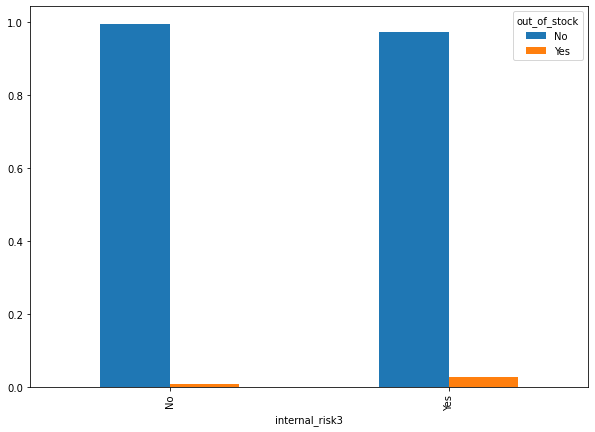

In [220]:
crosstab = pd.crosstab(df["internal_risk3"],df["out_of_stock"])
print(crosstab)
probs = crosstab.T.div(crosstab.T.sum()).T

print('*'*50)
print(probs)

fig,ax = plt.subplots()
probs.plot(kind='bar',ax=ax,figsize =(10,7))
plt.show()

In [221]:
df.columns

Index(['po_nbr', 'present_inv', 'lead_time', 'total_whpk_qty', 'fcst_3_mo',
       'fcst_6_mo', 'fcst_9_mo', 'sls_1_mo', 'sls_3_mo', 'sls_6_mo',
       'sls_9_mo', 'minimum_stock_qty', 'identified_defect',
       'spare_parts_overdue', 'avg_ratings_6_mo', 'avg_ratings_12_mo',
       'stock_overdue', 'internal_risk1', 'internal_risk2',
       'production_quality_risk', 'pdt_recsys', 'internal_risk3',
       'out_of_stock'],
      dtype='object')

In [224]:
ct = pd.crosstab(df['out_of_stock'],df['internal_risk1'],normalize=True)

In [230]:
oos_m = ct.sum(axis =1) #Marginal Probs
oos_m

out_of_stock
No     0.992684
Yes    0.007316
dtype: float64

In [229]:
cop = ct.divide(oos_m,axis =1)
cop

internal_risk1,No,Yes
out_of_stock,,
No,0.772714,30.838527
Yes,0.006149,0.165722


In [ ]:
p(a|b) = p(a^b)/p(b)

out_of_stock        No   Yes     All
internal_risk1                      
No              148038  1178  149216
Yes              43544   234   43778
All             191582  1412  192994
**************************************************
out_of_stock          No       Yes  All
internal_risk1                         
No              0.496053  0.003947  0.5
Yes             0.497327  0.002673  0.5
All             0.496342  0.003658  0.5


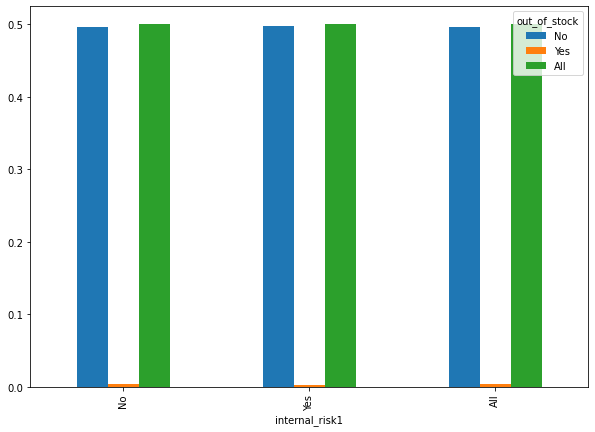

In [129]:
crosstab = pd.crosstab(df["internal_risk1"],df["out_of_stock"],margins=True)

print(crosstab)
probs = crosstab.T.div(crosstab.T.sum()).T

print('*'*50)
print(probs)

fig,ax = plt.subplots()
probs.plot(kind='bar',ax=ax,figsize =(10,7))
plt.show()

out_of_stock        No   Yes     All
internal_risk2                      
No              191546  1410  192956
Yes                 36     2      38
All             191582  1412  192994
**************************************************
out_of_stock          No       Yes  All
internal_risk2                         
No              0.496346  0.003654  0.5
Yes             0.473684  0.026316  0.5
All             0.496342  0.003658  0.5


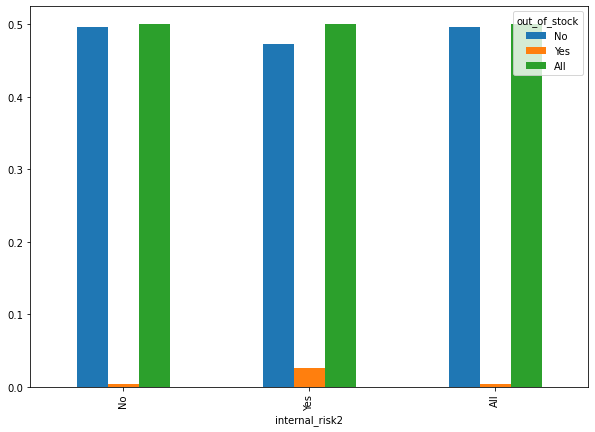

In [130]:
crosstab = pd.crosstab(df["internal_risk2"],df["out_of_stock"],margins=True)

print(crosstab)
probs = crosstab.T.div(crosstab.T.sum()).T

print('*'*50)
print(probs)

fig,ax = plt.subplots()
probs.plot(kind='bar',ax=ax,figsize =(10,7))
plt.show()

In [131]:
df.columns

Index(['po_nbr', 'present_inv', 'lead_time', 'total_whpk_qty', 'fcst_3_mo',
       'fcst_6_mo', 'fcst_9_mo', 'sls_1_mo', 'sls_3_mo', 'sls_6_mo',
       'sls_9_mo', 'minimum_stock_qty', 'identified_defect',
       'spare_parts_overdue', 'avg_ratings_6_mo', 'avg_ratings_12_mo',
       'stock_overdue', 'internal_risk1', 'internal_risk2',
       'production_quality_risk', 'pdt_recsys', 'internal_risk3',
       'out_of_stock'],
      dtype='object')

In [ ]:
pdt_recsys

out_of_stock      No   Yes     All
pdt_recsys                        
No              6978    64    7042
Yes           184604  1348  185952
All           191582  1412  192994
**************************************************
out_of_stock        No       Yes  All
pdt_recsys                           
No            0.495456  0.004544  0.5
Yes           0.496375  0.003625  0.5
All           0.496342  0.003658  0.5


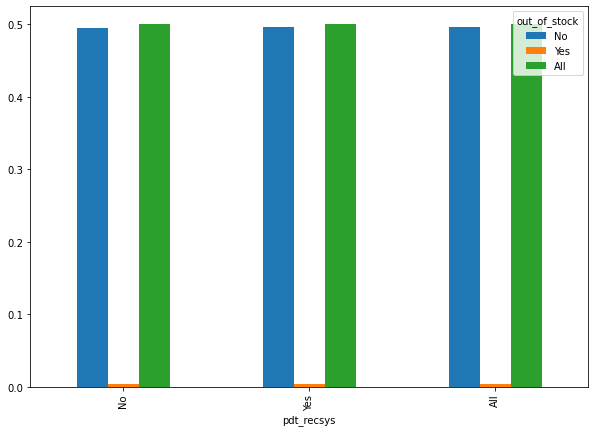

In [132]:
crosstab = pd.crosstab(df["pdt_recsys"],df["out_of_stock"],margins=True)

print(crosstab)
probs = crosstab.T.div(crosstab.T.sum()).T

print('*'*50)
print(probs)

fig,ax = plt.subplots()
probs.plot(kind='bar',ax=ax,figsize =(10,7))
plt.show()

out_of_stock           No   Yes
identified_defect              
No                 191496  1403
Yes                    86     9
**************************************************
out_of_stock             No       Yes
identified_defect                    
No                 0.992727  0.007273
Yes                0.905263  0.094737


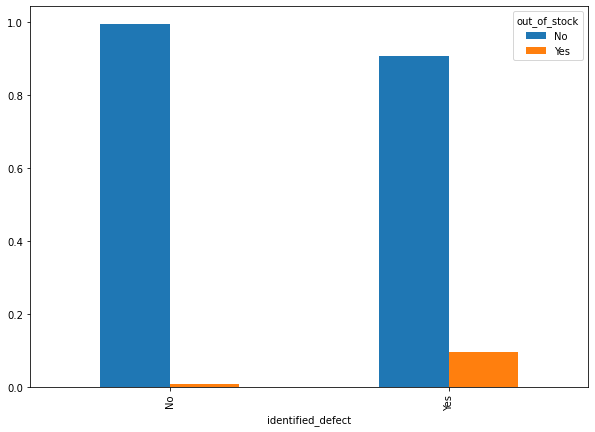

In [231]:
crosstab = pd.crosstab(df["identified_defect"],df["out_of_stock"])

print(crosstab)
probs = crosstab.T.div(crosstab.T.sum()).T

print('*'*50)
print(probs)

fig,ax = plt.subplots()
probs.plot(kind='bar',ax=ax,figsize =(10,7))
plt.show()

In [ ]:
#There 

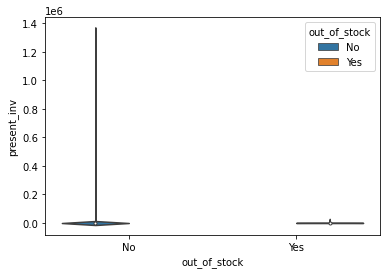

In [135]:
sns.violinplot(x = 'out_of_stock',y = 'present_inv' ,hue = 'out_of_stock', data = df,size=15,notch = True)
plt.show()

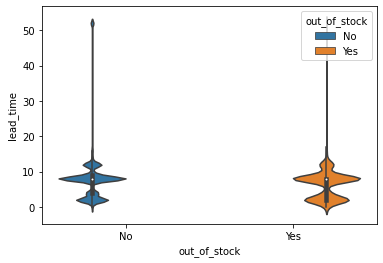

In [136]:
sns.violinplot(x = 'out_of_stock',y = 'lead_time' ,hue = 'out_of_stock', data = df,size=15,notch = True)
plt.show()

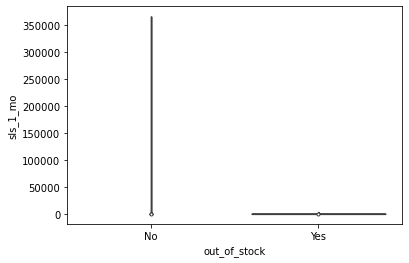

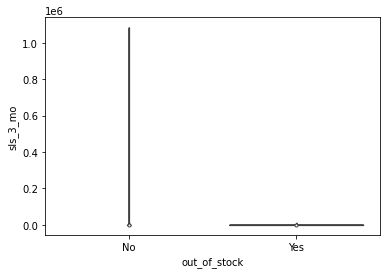

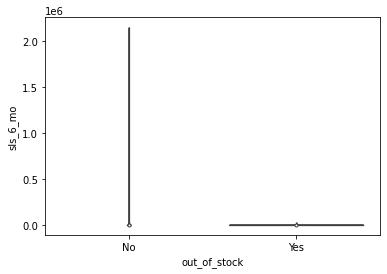

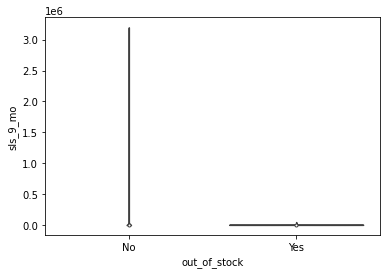

In [137]:
sns.violinplot(x=df['out_of_stock'],y = df['sls_1_mo'])
plt.show()

sns.violinplot(x=df['out_of_stock'],y = df['sls_3_mo'])
plt.show()

sns.violinplot(x=df['out_of_stock'],y = df['sls_6_mo'])
plt.show()

sns.violinplot(x=df['out_of_stock'],y = df['sls_9_mo'])
plt.show()


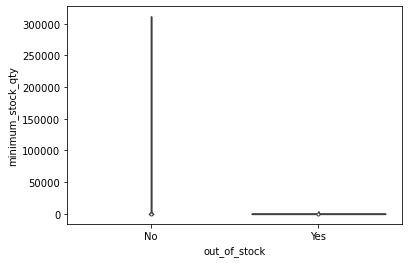

In [232]:
sns.violinplot(x=df['out_of_stock'],y = df['minimum_stock_qty'])
plt.show()

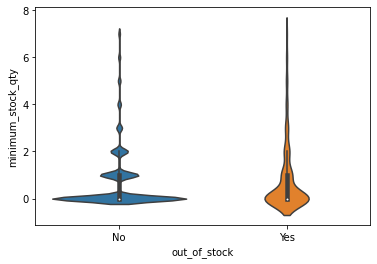

In [141]:
q1_minimum_stock_qty = df.minimum_stock_qty.quantile(0.25) # Storing the 25th percentile value
q3_minimum_stock_qty = df.minimum_stock_qty.quantile(0.75) # Storing the 75 th percentile value

iqr_minimum_stock_qty = q3_minimum_stock_qty - q1_minimum_stock_qty  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound = q1_minimum_stock_qty - 1.5*iqr_minimum_stock_qty
upper_bound = q3_minimum_stock_qty + 1.5*iqr_minimum_stock_qty



range_m= (df.minimum_stock_qty >= lower_bound) & (df.minimum_stock_qty <= upper_bound)
sns.violinplot(x = 'out_of_stock',y = 'minimum_stock_qty',data = df.loc[range_m],showfliers = False)
plt.show()

In [139]:
df.columns

Index(['po_nbr', 'present_inv', 'lead_time', 'total_whpk_qty', 'fcst_3_mo',
       'fcst_6_mo', 'fcst_9_mo', 'sls_1_mo', 'sls_3_mo', 'sls_6_mo',
       'sls_9_mo', 'minimum_stock_qty', 'identified_defect',
       'spare_parts_overdue', 'avg_ratings_6_mo', 'avg_ratings_12_mo',
       'stock_overdue', 'internal_risk1', 'internal_risk2',
       'production_quality_risk', 'pdt_recsys', 'internal_risk3',
       'out_of_stock'],
      dtype='object')

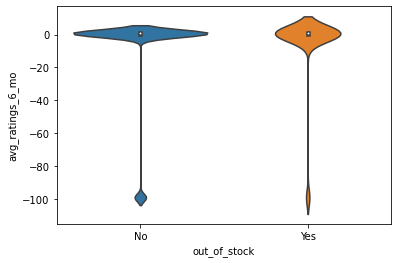

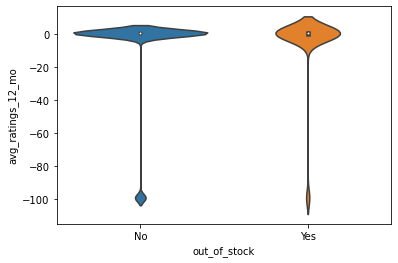

In [142]:
sns.violinplot(x=df['out_of_stock'],y = df['avg_ratings_6_mo'])
plt.show()

sns.violinplot(x=df['out_of_stock'],y = df['avg_ratings_12_mo'])
plt.show()

In [ ]:
# sns.pairplot(df,hue = 'out_of_stock')
# plt.show()

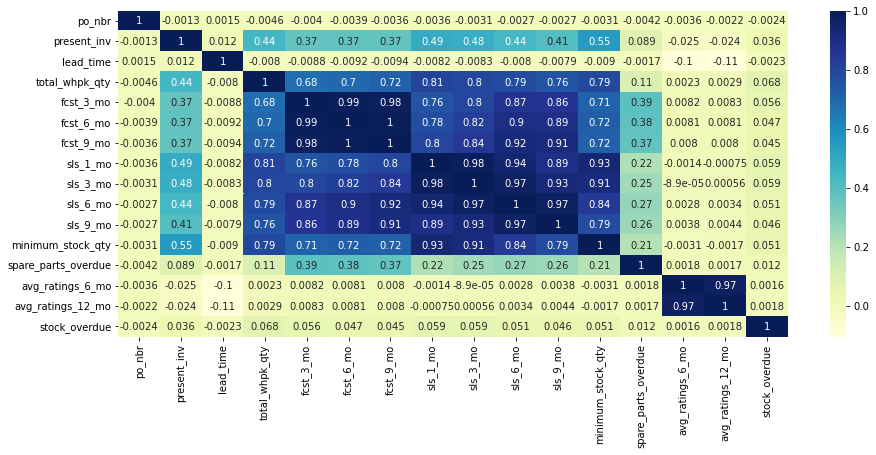

In [149]:
plt.figure(figsize=(15,6))

sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
plt.show()

In [150]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
po_nbr,192994.0,2.256478e+06,764456.576351,1045867.0,1594203.25,2072349.00,3041604.25,3526980.0
present_inv,192994.0,4.071565e+02,7308.631312,-13491.0,4.00,15.00,80.00,1370327.0
lead_time,181317.0,7.857542e+00,6.995806,0.0,4.00,8.00,9.00,52.0
total_whpk_qty,192994.0,4.989741e+01,1669.073170,0.0,0.00,0.00,0.00,328060.0
fcst_3_mo,192994.0,1.916102e+02,5743.923043,0.0,0.00,0.00,4.00,1218328.0
fcst_6_mo,192994.0,3.689133e+02,11370.624038,0.0,0.00,0.00,12.00,2461360.0
fcst_9_mo,192994.0,5.411289e+02,16942.490139,0.0,0.00,0.00,20.00,3777304.0
sls_1_mo,192994.0,6.036901e+01,2115.744453,0.0,0.00,0.00,4.00,366191.0
sls_3_mo,192994.0,1.896981e+02,6265.479413,0.0,0.00,1.00,15.00,1084974.0
sls_6_mo,192994.0,3.686664e+02,11631.795911,0.0,0.00,2.00,31.00,2146625.0


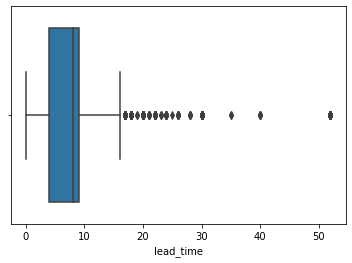

In [151]:
ax = sns.boxplot(x=df["lead_time"])
plt.show()

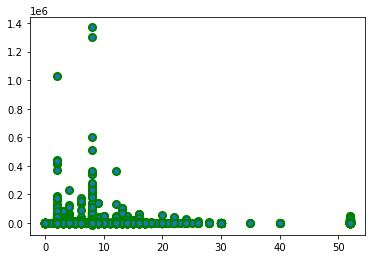

In [152]:
plt.scatter(df['lead_time'], df['present_inv'],

linewidths = 2,
marker ="o",
edgecolor ="green",
s = 50)
plt.show()

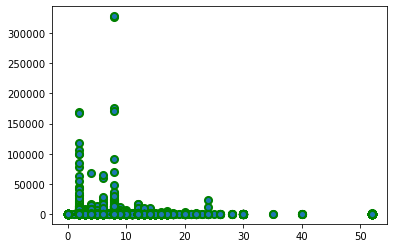

In [153]:
plt.scatter(df['lead_time'], df['total_whpk_qty'],

linewidths = 2,
marker ="o",
edgecolor ="green",
s = 50)
plt.show()

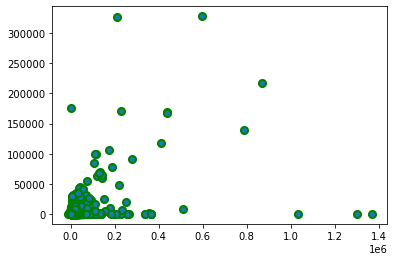

In [154]:
plt.scatter(df['present_inv'], df['total_whpk_qty'],

linewidths = 2,
marker ="o",
edgecolor ="green",
s = 50)
plt.show()

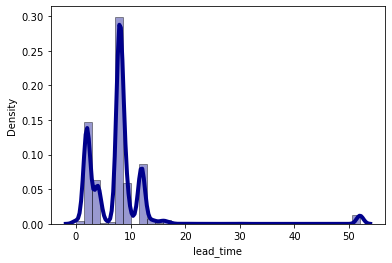

In [155]:
sns.distplot(df['lead_time'], hist=True, kde=True,

bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

#### Hypothesis: Higher 'present inventory' leads to more OOS scenario

Null Hypothesis: Ho: Mean 'present inventory' qty is same for OOS and Not OOS scenarios

Alt: Ha: Mean 'present inventory' qty for OOS is greater than Not OOS scenarios/

In [ ]:
t-test -mean, std finite pop -- CLT 
normal disb of sample
independent obs in samples
equal variance

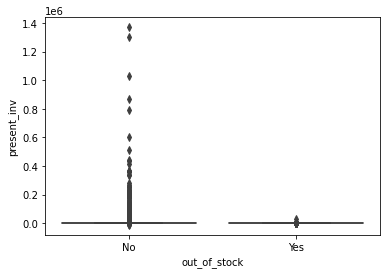

In [172]:
sns.boxplot(data=df,x='out_of_stock',y='present_inv')
plt.show()

In [173]:
df['out_of_stock'].value_counts()

No     191582
Yes      1412
Name: out_of_stock, dtype: int64

In [234]:
#Taking random samples to obtain data for both the groups
noos=df[df['out_of_stock']=='No'].sample(1412,replace=False)
oos=df[df['out_of_stock']=='Yes'].sample(1412,replace=False)
print(noos.shape,oos.shape)

(1412, 23) (1412, 23)


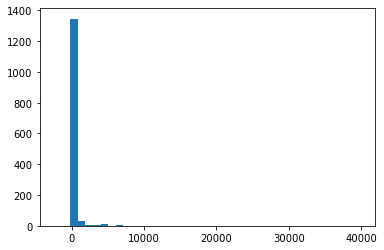

In [235]:
plt.hist(noos['present_inv'],bins=40)

plt.show()

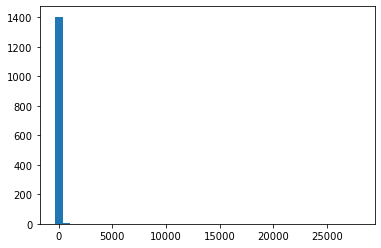

In [236]:
plt.hist(oos['present_inv'],bins=40)

plt.show()

In [238]:
print(np.var(oos['present_inv']))
print(np.var(noos['present_inv']))

564835.0639415092
3120322.3635110627


In [239]:
print(np.std(oos['present_inv']))
print(np.std(noos['present_inv']))

751.5550970763948
1766.4434221086908


In [240]:
t_test, p_value = stats.ttest_ind(oos['present_inv'],noos['present_inv'],alternative='greater', equal_var = False)
t_test, p_value

(-4.851896244943191, 0.9999993388664782)

In [ ]:
#Test for Normality - QQ plot
Kolmogorov Smirnoff test, Anderson Darling Test

In [241]:
#Test for equal variance 

In [251]:
oos = oos[oos['present_inv']>0]

In [252]:
noos = noos[noos['present_inv']>0]

In [253]:
noos['present_inv'].min()

1.0

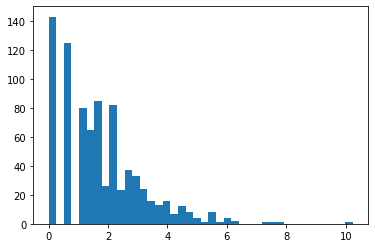

In [254]:
plt.hist(np.log(oos['present_inv']),bins=40)

plt.show()

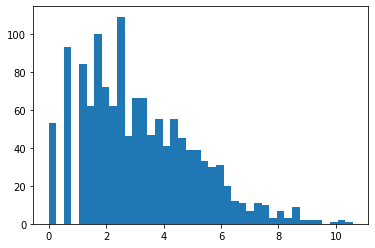

In [255]:
plt.hist(np.log(noos['present_inv']),bins=40)

plt.show()

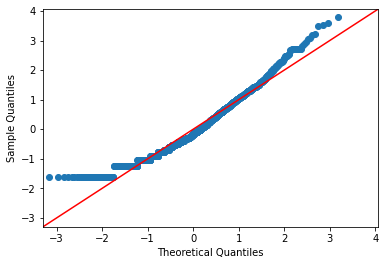

In [257]:
sm.qqplot(np.log(noos['present_inv']),line = '45',fit=True)
plt.show()

In [ ]:
#Shapiro Wilk- 

In [ ]:
box cox

In [ ]:
prob--

In [ ]:
Risk1 Vs OOS
Yes/No Vs Y/N --chisquare contingency 

In [ ]:
Chapter-2 

In [ ]:
Variables -- Lead time , WHP_QTY, RISK2, ETC....